In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm,tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer,scale,LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.metrics import r2_score,mean_squared_error, explained_variance_score, accuracy_score
from scipy import sparse
from scipy.sparse import hstack,vstack

# Deep Learning 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Activation
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('Claims2.csv',encoding='mac_roman', low_memory=False)

In [3]:
df

,OCCURRENCE,LOSSDATE,LOB,COVERAGE,STATE,DESCR,CADDR1,CSTATE,CZIP,LOCNM,IZIP,DRIVERAGE,INCURRED,PREMIUM
0,LXMS-8139,20121231,AL,PROPERTY DAMAGE - AUTO,TX,DAMAGE TO FLOOR,2025 Umar Ave,TX,78504,JONES MOVING & STORAGE COMPANY,75356,0,0,18476.0
1,ZUHG-5230,20121231,IM,MOTOR TRUCK CARGO,FL,DAMAGE TO CLAIMANT ITEMS,13891 Lake Mahogany Blvd,FL,33907,"VERNAY & NELSON, INC.",33901,0,105194,18476.0
2,ZUMS-4898,20121231,AL,COMPREHENSIVE,CA,THEFT OF VEHICLES,7009 South Jordan Road,CO,80112,"JOHNSON STORAGE & MOVING, INC.",80112,0,326204,18476.0
3,LXMS-7274,20121231,AL,PROPERTY DAMAGE - AUTO,AR,INSURED VEHICLE HIT OVERHANG ON CLAIMANTS BUIL...,2729 E Braodway,AR,72301,"GARRETT`S MOVING & STORAGE, IN",75228,34,171322,19304.0
4,LXMS-7268,20121231,GL,PROPERTY DAMAGE - GL,TX,CLAIMANT ALLEGES THE INSURED HAS CRIMPED A LIN...,2025 Umar,TX,78504,JONES MOVING & STORAGE COMPANY,78551,0,907656,21178.0
5,ZUMS-4938,20121231,AL,COLLISION,CA,INSURED WAS TBONED BY UNKNOWN VEHICLE,7009 S Jordan Road,CO,80112,"JOHNSON STORAGE & MOVING, INC.",80112,0,1400446,22223.0
6,ZUMS-4898,20121231,AL,COMPREHENSIVE,CA,THEFT OF VEHICLES,7009 South Jordan Road,CO,80112,"JOHNSON STORAGE & MOVING, INC.",80112,0,796769,22223.0
7,ZUMS-4885,20121231,AL,PROPERTY DAMAGE - AUTO,TX,INSURED DRIVER BACKED INTO CLAIMANT VEHICLE TH...,"3231 Allen Parkway, #2103",TX,77019,"THE ORIGINAL 3 MEN MOVERS, LTD",77074,44,77791,29908.0
8,ZUMS-8695,20121230,GL,PROPERTY DAMAGE - GL,CO,CLAIMANT ALLEGES CONTINUOUS WATER DAMAGE DUE T...,2986 S Killarney Way,CO,80013,"BAILEY`S HOLDING COMPANY, INC.",84054,0,3043240,29908.0
9,LXMS-7913,20121230,AL,PROPERTY DAMAGE - AUTO,OR,INSURED VEHICLE HIT A SECTION OF GUARD RAIL WH...,NaN,,NaN,CORVALLIS MOVING & STORAGE CO,97030,51,166000,29908.0


# TensorFlow

In [4]:
hello=tf.constant('umm hello?')
sess=tf.Session()
print(sess.run(hello))

b'umm hello?'


In [5]:
df =df.fillna(0)
print(df.isnull().sum())

OCCURRENCE    0
LOSSDATE      0
LOB           0
COVERAGE      0
STATE         0
DESCR         0
CADDR1        0
CSTATE        0
CZIP          0
LOCNM         0
IZIP          0
DRIVERAGE     0
INCURRED      0
PREMIUM       0
dtype: int64


In [6]:
X = df.iloc[:,12].values
y = df.iloc[:,13].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train.shape

(16075,)

# keras with Tensorflow backend

# 10 features in y

In [8]:
def createNewY(y_test):
    newy=[]
    # 0, 10, 100, 1000, 10000, 100000, 1000000, 10000000
    for i in y_test:
        if(i<10):
            newy.append([1,0,0,0,0,0,0,0])
        elif(i>=10 and i<100):
            newy.append([0,1,0,0,0,0,0,0])
        elif(i>=100 and i<1000):
            newy.append([0,0,1,0,0,0,0,0])
        elif(i>=1000 and i<10000):
            newy.append([0,0,0,1,0,0,0,0])
        elif(i>=10000 and i<100000):
            newy.append([0,0,0,0,1,0,0,0])
        elif(i>=100000 and i<1000000):
            newy.append([0,0,0,0,0,1,0,0])
        elif(i>=1000000 and i<10000000):
            newy.append([0,0,0,0,0,0,1,0])
        elif(i>=10000000):
            newy.append([0,0,0,0,0,0,0,1])
    return newy
def createNewY1(y_test):
    newy=[]
    # 0, 10, 100, 1000, 10000, 100000, 1000000, 10000000
    for i in y_test:
        if(i<10):
            newy.append(0)
        elif(i>=10 and i<100):
            newy.append(1)
        elif(i>=100 and i<1000):
            newy.append(2)
        elif(i>=1000 and i<10000):
            newy.append(3)
        elif(i>=10000 and i<100000):
            newy.append(4)
        elif(i>=100000 and i<1000000):
            newy.append(5)
        elif(i>=1000000 and i<10000000):
            newy.append(6)
        elif(i>=10000000):
            newy.append(7)
    return newy

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train

array([11446.   ,  2213.763, 38757.   , ...,     0.   ,     0.   ,
           0.   ])

In [10]:
model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=1))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['mse',])

model.fit(X_train, y_train,epochs=10,batch_size=2000)
y_pred=model.predict(X_test)
score = model.evaluate(X_test, y_test, batch_size=2000)
score

Epoch 1/10
16075/16075 [==============================] - 11s 660us/step - loss: nan - mean_squared_error: nan    
Epoch 2/10
16075/16075 [==============================] - 10s 641us/step - loss: nan - mean_squared_error: nan
Epoch 3/10
16075/16075 [==============================] - 10s 634us/step - loss: nan - mean_squared_error: nan
Epoch 4/10
16075/16075 [==============================] - 10s 634us/step - loss: nan - mean_squared_error: nan
Epoch 5/10
16075/16075 [==============================] - 10s 632us/step - loss: nan - mean_squared_error: nan
Epoch 6/10
16075/16075 [==============================] - 10s 636us/step - loss: nan - mean_squared_error: nan
Epoch 7/10
16075/16075 [==============================] - 10s 636us/step - loss: nan - mean_squared_error: nan
Epoch 8/10
16075/16075 [==============================] - 10s 644us/step - loss: nan - mean_squared_error: nan
Epoch 9/10
16075/16075 [==============================] - 10s 634us/step - loss: nan - mean_squared_error: n

[nan, nan]

In [11]:
def accuracy1(y_pred, y_test):
    count=0
    for i,j in zip(y_pred.round(), y_test):
        flag=1
        for k in range(8):
            if(i[k]!=j[k]):
                flag=0
            k+=1
        if(flag==1):
            count+=1
        
    return count/len(y_test)*100
                

In [12]:
y_pred[1]

array([nan], dtype=float32)

In [13]:
y_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

# pfft.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train[0]

0.0

In [15]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=1, units=6, kernel_initializer="uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
# Adding the output layer
classifier.add(Dense(activation="relu", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['mape'])
classifier.fit(X_train, y_train, batch_size = 100, epochs = 30)

Epoch 1/30
16075/16075 [==============================] - 1s 41us/step - loss: 438133876.1306 - mean_absolute_percentage_error: 66430029491.9565
Epoch 2/30
16075/16075 [==============================] - 0s 18us/step - loss: 438144576.7963 - mean_absolute_percentage_error: 69448562920.5101
Epoch 3/30
16075/16075 [==============================] - 0s 19us/step - loss: 437991703.3904 - mean_absolute_percentage_error: 60276591767.2908
Epoch 4/30
16075/16075 [==============================] - 0s 14us/step - loss: 437614473.0824 - mean_absolute_percentage_error: 61514915425.9409
Epoch 5/30
16075/16075 [==============================] - 0s 18us/step - loss: 438735358.7061 - mean_absolute_percentage_error: 69875210778.2768
Epoch 6/30
16075/16075 [==============================] - 0s 18us/step - loss: 437985794.4386 - mean_absolute_percentage_error: 59457215390.8554
Epoch 7/30
16075/16075 [==============================] - 0s 15us/step - loss: 437815066.7247 - mean_absolute_percentage_error: 73

In [16]:
y_pred=classifier.predict(X_test)
y_pred

array([[ 40.073673],
       [ 10.881291],
       [  5.359499],
       ...,
       [  5.359499],
       [186.97333 ],
       [165.2089  ]], dtype=float32)

In [17]:
score = classifier.evaluate(X_test, y_test, batch_size=2000)
score

4019/4019 [==============================] - 0s 19us/step


[422749946.6573775, 89054297844.98035]

In [18]:
def accuracy2(y_pred,y_test):
    count=0
    for i in range(len(y_test)):
        high=y_test[i]+(0.5*y_test[i])
        low=y_test[i]-(0.5*y_test[i])
        if(y_pred[i]<high and y_pred[i]>low):
            count+=1
    return count/(len(y_test))

In [19]:
y_pred[4]

array([10.938677], dtype=float32)

In [20]:
y_test[4]

22150.0

In [21]:
accuracy2(y_pred,y_test)

0.004976362279173924

In [22]:
y_test

array([    0.,     0., 24137., ...,     0.,  8249.,     0.])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
reg = LinearRegression()
reg.fit(X_train,y_train)
pred= reg.predict(X_test)
print(explained_variance_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test,pred))

ValueError: Expected 2D array, got 1D array instead:
array=[ 127466  329500    9500 ... 1010603  380295  875000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
np.corrcoef(X,y)

array([[1.       , 0.0094484],
       [0.0094484, 1.       ]])

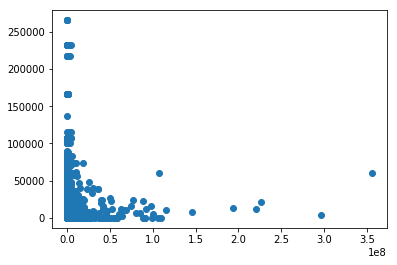

In [28]:
plt.scatter(X,y)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


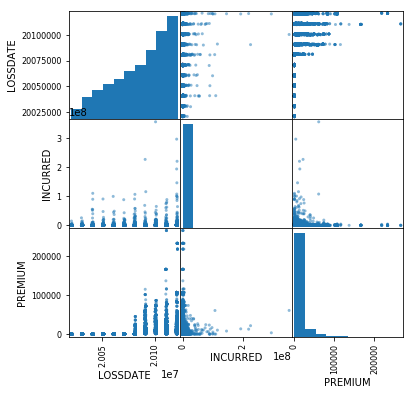